# LAB 17 Example

In [4]:
d = read.csv("https://raw.githubusercontent.com/tomcm39/data/master/candy-power-ranking/candy-data.csv")
print(nrow(d))
print(d)

[1] 85
                competitorname chocolate fruity caramel peanutyalmondy nougat
1                    100 Grand         1      0       1              0      0
2                 3 Musketeers         1      0       0              0      1
3                     One dime         0      0       0              0      0
4                  One quarter         0      0       0              0      0
5                    Air Heads         0      1       0              0      0
6                   Almond Joy         1      0       0              1      0
7                    Baby Ruth         1      0       1              1      1
8           Boston Baked Beans         0      0       0              1      0
9                   Candy Corn         0      0       0              0      0
10          Caramel Apple Pops         0      1       1              0      0
11             Charleston Chew         1      0       0              0      1
12  Chewey Lemonhead Fruit Mix         0      1       0  

# Build a logistic model for "fruity" candy characteristic




In [10]:
model = glm( fruity~sugarpercent+pricepercent+bar, data=d, family=binomial)
print(summary(model))


Call:
glm(formula = fruity ~ sugarpercent + pricepercent + bar, family = binomial, 
    data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8009  -1.0597  -0.0001   0.9073   1.7330  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)     0.8773     0.5431   1.615   0.1063  
sugarpercent    0.9396     0.9541   0.985   0.3247  
pricepercent   -2.3688     1.1509  -2.058   0.0396 *
bar           -18.2724  1383.6494  -0.013   0.9895  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 116.880  on 84  degrees of freedom
Residual deviance:  81.759  on 81  degrees of freedom
AIC: 89.759

Number of Fisher Scoring iterations: 17



### Description of target variable and covariates
My model is attempting to classify candy as fruity or not fruity.
I chose 3 covariates: The percentage of sugar in the candy, the unit price percentile compared to the other candy, and whether or not the candy is shaped into a bar.

I fit a logistic regression model to my candy data.

### Description using log-odds
In terms of log-odds, the intercept equals $0.88$, sugar percentile equals $0.94$, price percentile equals $-2.37$, and whether it is a candy bar equals $-18.27$.
Candy with a higher sugar percentile could indicate it is fruity (positive log-odds). 
However, candy that is more expensive or formed into a bar indicates the candy is likely not fruity (negative log-odds).

### Description using odds
In terms of odds, the intercept equals $e^{0.88}=2.41$, sugar percentile equals $e^{0.94}=2.55$, price percentile equals $e^{-2.37}=0.09$, and whether it is a candy bar equals $e{^-18.27}<0.01$.
A one unit increase in the sugar percentile of a piece of candy results in a $2.5$ times increase in the the odds it is fruity.
A one unit increase in the price percentile results in a 0.09 times decrease in the odds it is fruity.
Put another way, a one unit increase in price percentile results in a $11$ times increase in the odds the candy is **not** fruity.
If the candy is a bar, it is extremely unlikely to also be fruity.

### Description of significant variables
The price percentile is a significant covariate.
The pvalue <0.05 and indicates the estimated log-odds is unlikely to have come from a null distribution centered at a log-odds of $0$.


### Plot of data

                    [,1]
(Intercept)    0.8772523
sugarpercent   0.9395764
pricepercent  -2.3687522
bar          -18.2724021


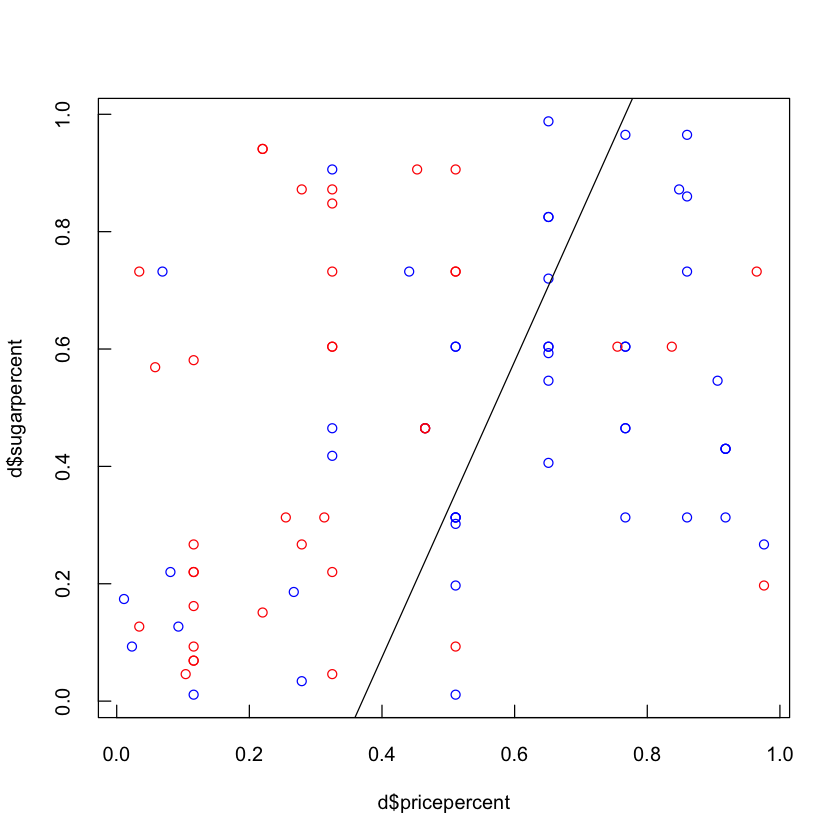

In [32]:
colors = ifelse( d$fruity==1,'red','blue')
plot(d$pricepercent,d$sugarpercent,tck=0.02,col=colors)

coefficients = as.matrix(coef(model))
print(coefficients)

xs = seq(0,1,0.01)
lines(x, (-coefficients[1]/coefficients[2]) - (coefficients[3]/coefficients[2])*x)

### Accuracy = TP+TN/ALL

#### Make predictions on training data

In [48]:
trainingData  = d[,c('sugarpercent','pricepercent','bar')]
trainingData  = cbind(1,trainingData)

predictions   = as.matrix(trainingData) %*% coefficients
probabilities = exp(predictions)/(1+predictions)
decisions = ifelse(predictions>=0,1,0)

Accuracy = mean(d$fruity==decisions)
print(Accuracy)

[1] 0.7647059


We can make correct guesses about whether the candy is fruity approximately 76% of the time by fitting a logistic regression model and including the sugar and price percentile, and whether the candy is a bar. 